# A/B Testing

Also known as **split testing or bucket testing**, used for comparing two versions of features (typically, a webpage or app feature) against each other to determine which one performs better, ensuring data-driven decision-making for the feature implementation on the production.

##  Problem Statement:
Evaluate the impact of adding 360-degree product videos feature on the product page on sales for an E-Commerce Platform.

The goal is to determine whether including 360-degree product videos increases the conversion rate and overall revenue compared to a product page without these videos and only images of the products.

##  Dataset Column Names:
* **UserID**: Unique identifier for each user.
* **Group**: A/B test group identifier ('Control' for no video(only product images), 'Treatment' for 360-degree video with product images).
* **Timestamp**: The time when the user interacted with the system.
* **PageViewed**: The specific page or feature the user interacted with (e.g., 'Home Page', 'Product Page', 'Checkout Page').
* **Action**: The action taken by the user (e.g., 'View Product', 'Add to Cart', 'Purchase').
* **Conversion**: A binary indicator (0 for no purchase, 1 for purchase).
* **Revenue**: The amount of money spent by the user (if applicable).
* **DeviceType**: Type of device used (e.g., 'Desktop', 'Mobile').
* **SessionDuration**: The duration of the user session in seconds.
* **Location**: Geographic location of the user.

### Building a Fake Dataset for A/B Testing

I'll create two datasets: Control and Treatment Respectively, using `Faker` Library, for my specific needs

In [3]:
!pip install Faker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.0 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
from faker import Faker
from datetime import datetime

In [21]:
# Initialize Faker and random seed for reproducibility
faker = Faker()
np.random.seed(42)

# Constants
num_rows = 50000
group_choices = ['Control', 'Treatment']
page_viewed = 'Product Page'
device_choices = ['Desktop', 'Mobile']
location_choices = ['New Delhi', 'Mumbai', 'Bangalore', 'Hyderabad', 'Chennai', 'Kolkata']

# Generate fake data for Control group
control_data = {
    'UserID': [faker.uuid4() for _ in range(num_rows)],
    'Group': ['Control'] * num_rows,
    'Timestamp': [faker.date_time_between(start_date=datetime(2024, 1, 1), end_date=datetime(2024, 1, 31)) for _ in range(num_rows)],
    'PageViewed': [page_viewed] * num_rows,
    'DeviceType': np.random.choice(device_choices, num_rows),
    'SessionDuration': np.random.randint(1, 30, num_rows),
    'Location': np.random.choice(location_choices, num_rows)
}

# Initialize Conversion and Revenue lists
conversions = []
revenues = []

# Adjust conversion and revenue for control and treatment groups
for i in range(num_rows):
    conversion = np.random.choice([0, 1], p=[0.99, 0.01])  # 10% conversion rate for control
    conversions.append(conversion)
    if conversion == 1:
        revenues.append(np.random.choice([500, 1000, 2500, 4000], p=[0.30, 0.30, 0.25, 0.15]))
    else:
        revenues.append(0)

# Add Conversion and Revenue to data dictionary
control_data['Revenue'] = revenues
control_data['Conversion'] = conversions

In [22]:
# Combine the data into a single DataFrame
df_control = pd.DataFrame(control_data)

In [23]:
df_control

,UserID,Group,Timestamp,PageViewed,DeviceType,SessionDuration,Location,Revenue,Conversion
0,9cb28c56-5a4b-412f-a838-a2b6ebf85fb0,Control,2024-01-17 19:24:35.249428,Product Page,Desktop,26,New Delhi,0,0
1,2084dea5-d2a9-43ee-bb72-71f2ac79dcef,Control,2024-01-20 15:21:26.336643,Product Page,Mobile,26,Chennai,0,0
2,4eafa760-ccff-418d-8b52-b5fa40133e17,Control,2024-01-06 15:34:50.776139,Product Page,Desktop,17,Chennai,0,0
3,ff3ef75f-282a-4938-946b-18154ca66328,Control,2024-01-06 02:25:14.273830,Product Page,Desktop,19,Chennai,0,0
4,0a149d60-bf16-47ba-971d-6cf2d5fe8ac6,Control,2024-01-21 22:44:10.052839,Product Page,Desktop,12,Mumbai,0,0
...,...,...,...,...,...,...,...,...,...
49995,9762c8b7-e270-4c27-9886-246eb48d0420,Control,2024-01-16 16:02:23.286172,Product Page,Mobile,20,Mumbai,0,0
49996,9be877e1-2523-41d7-bb74-63c2adc66c33,Control,2024-01-06 00:36:04.684950,Product Page,Mobile,4,New Delhi,0,0
49997,cad5ccc6-e16f-44d6-8ddc-fdcb7bc84f44,Control,2024-01-10 06:49:02.961884,Product Page,Desktop,5,Mumbai,0,0
49998,d9b4fb2f-6c9e-4934-af84-f761afe5cd2a,Control,2024-01-29 04:35:27.072879,Product Page,Mobile,14,Bangalore,0,0


In [18]:
# Generate fake data for Control group
treatment_data = {
    'UserID': [faker.uuid4() for _ in range(num_rows)],
    'Group': ['Treatment'] * num_rows,
    'Timestamp': [faker.date_time_between(start_date=datetime(2024, 1, 1), end_date=datetime(2024, 1, 31)) for _ in range(num_rows)],
    'PageViewed': [page_viewed] * num_rows,
    'DeviceType': np.random.choice(device_choices, num_rows),
    'SessionDuration': np.random.randint(1, 30, num_rows),
    'Location': np.random.choice(location_choices, num_rows)
}

# Initialize Conversion and Revenue lists
conversions = []
revenues = []

# Adjust conversion and revenue for control and treatment groups
for i in range(num_rows):
    conversion = np.random.choice([0, 1], p=[0.89, 0.11])  # 10% conversion rate for control
    conversions.append(conversion)
    if conversion == 1:
        revenues.append(np.random.choice([500, 1000, 2500, 4000], p=[0.35, 0.25, 0.20, 0.20]))
    else:
        revenues.append(0)

# Add Conversion and Revenue to data dictionary
treatment_data['Revenue'] = revenues
treatment_data['Conversion'] = conversions

In [19]:
df_treatment = pd.DataFrame(treatment_data)

In [20]:
df_treatment

,UserID,Group,Timestamp,PageViewed,DeviceType,SessionDuration,Location,Revenue,Conversion
0,bc169a03-2984-4ae8-ad4d-82340b11f3a7,Treatment,2024-01-16 09:15:08.025007,Product Page,Mobile,3,Bangalore,0,0
1,e1ea505b-f4ac-4616-bde4-202de6f7c5f2,Treatment,2024-01-01 17:03:04.395736,Product Page,Mobile,6,Chennai,0,0
2,a2f35c61-c2cf-4ae6-8943-b314a763fc32,Treatment,2024-01-20 03:26:01.915730,Product Page,Desktop,15,Bangalore,0,0
3,79ab1c84-6059-4636-a229-fabad0a2d76c,Treatment,2024-01-13 00:11:05.694058,Product Page,Mobile,19,Kolkata,2500,1
4,09814eb9-ef2a-49b5-9570-5642fc22bd46,Treatment,2024-01-29 11:23:52.873081,Product Page,Mobile,10,Hyderabad,0,0
...,...,...,...,...,...,...,...,...,...
49995,3213829a-c2ee-4e9d-ac3c-b44d4bd7be5f,Treatment,2024-01-07 22:25:22.279748,Product Page,Mobile,12,Hyderabad,0,0
49996,d4b2aa15-b378-4a2d-b540-4561ae878da1,Treatment,2024-01-03 17:40:41.096876,Product Page,Mobile,9,Chennai,0,0
49997,cb3eb800-7cf0-4bf0-ad2a-9e31d2e9217c,Treatment,2024-01-01 17:34:20.504523,Product Page,Mobile,23,Chennai,0,0
49998,cf6c2542-43d6-4a36-93d3-b317878ad099,Treatment,2024-01-15 03:57:19.672121,Product Page,Desktop,5,Chennai,0,0


In [45]:
df_control.to_csv("df_control.csv")
df_treatment.to_csv("df_treatment.csv")

Now since, I have a dataset, Let's perform

### Exploratory Data Analysis

One of the most important createria for A/B Testing is that there should be no same person on both the variants of the same test.


So, lets' check.


### Checking for overlapping user in more than one variant of the AB test?



In [36]:
# Check for overlapping users
overlapping_users = set(df_control['UserID']).intersection(set(df_treatment['UserID']))

if len(overlapping_users) > 0:
    print(f"Overlapping Users Found: {len(overlapping_users)}")
else:
    print("No Overlapping Users Found")

No Overlapping Users Found


Now, that it is proved that we are working with unique users per dataset.

Let's understand our data more!

In [32]:
# Get information about the dataset
df_control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   UserID           50000 non-null  object        
 1   Group            50000 non-null  object        
 2   Timestamp        50000 non-null  datetime64[ns]
 3   PageViewed       50000 non-null  object        
 4   DeviceType       50000 non-null  object        
 5   SessionDuration  50000 non-null  int64         
 6   Location         50000 non-null  object        
 7   Revenue          50000 non-null  int64         
 8   Conversion       50000 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 3.4+ MB


### Conclusions:

1. We have three different dtypes: datetime64[ns](1), int64(3), object(5). So, I don't need to perform any dtypes conversions as all the columns dtypes makes sense to me.


2. No null columns, meaning no missing data. Hence, I don't need to  perform pre-proccessing "missing_value".


Since, we have same columns in both the tables.

I will skip the treatment group info(). You can check it out for your understanding.



In [46]:
# Get summary statistics of the dataset
df_control.describe()

,Timestamp,SessionDuration,Revenue,Conversion
count,50000,50000.000000,50000.000000,50000.000000
mean,2024-01-16 00:31:06.670697984,15.069860,15.880000,0.009440
min,2024-01-01 00:00:20.454048,1.000000,0.000000,0.000000
25%,2024-01-08 13:39:23.597788416,8.000000,0.000000,0.000000
50%,2024-01-16 00:35:14.944366080,15.000000,0.000000,0.000000
75%,2024-01-23 12:09:48.891715072,22.000000,0.000000,0.000000
max,2024-01-30 23:59:52.826358,29.000000,4000.000000,1.000000
std,NaN,8.380066,203.343681,0.096701


In [47]:
# Get summary statistics of the dataset
df_treatment.describe()

,Timestamp,SessionDuration,Revenue,Conversion
count,50000,50000.000000,50000.000000,50000.000000
mean,2024-01-15 23:19:17.824239872,14.959420,190.670000,0.110240
min,2024-01-01 00:00:03.457519,1.000000,0.000000,0.000000
25%,2024-01-08 11:34:33.847099136,8.000000,0.000000,0.000000
50%,2024-01-15 23:22:47.469054976,15.000000,0.000000,0.000000
75%,2024-01-23 10:58:03.732015616,22.000000,0.000000,0.000000
max,2024-01-30 23:59:30.119722,29.000000,4000.000000,1.000000
std,NaN,8.354015,700.006965,0.313192


### Conclusion:

It's clear that, `df_treatment` has more variance for both "Revenue" and "Conversion", meaning there could be a significant difference in Conversion Rates between groups.

This is a good sign but this is not enough evidence for us to confidently go with the new feature, as we have not measured how confident we are in this result.  

So, let's do other stuff.

### Calculate conversion rates


In [24]:
# Calculate conversion rates
control_conversions = sum(1 for c in control_data['Conversion'] if c == 1)

# Total number of users in each group
control_users = len(control_data['UserID']) # Access the 'UserID' list to get the count

# Conversion rates
control_conversion_rate = control_conversions / control_users

print(f"Control Conversion Rate: {control_conversion_rate:.4f}")

Control Conversion Rate: 0.0094


In [28]:
# Calculate conversion rates
treatment_conversions = sum(1 for c in treatment_data['Conversion'] if c == 1)

# Total number of users in each group
treatment_users = len(treatment_data['UserID']) # Access the 'UserID' list to get the count

# Conversion rates
treatment_conversion_rate = treatment_conversions / treatment_users

print(f"Treatment Conversion Rate: {treatment_conversion_rate:.4f}")

Treatment Conversion Rate: 0.1102


In [49]:
# Concatenate the control and treatment dataframes
df = pd.concat([df_control, df_treatment])

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

### Plot Conversion Rates

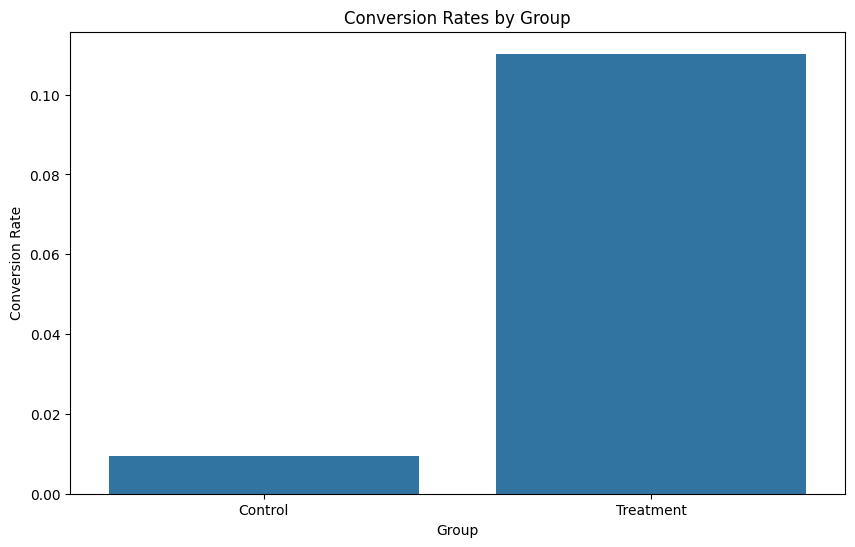

In [50]:
# Calculate conversion rates for each group
conversion_rates = df.groupby('Group')['Conversion'].mean().reset_index()

# Plot conversion rates
plt.figure(figsize=(10, 6))
sns.barplot(x='Group', y='Conversion', data=conversion_rates)
plt.title('Conversion Rates by Group')
plt.ylabel('Conversion Rate')
plt.xlabel('Group')
plt.show()

### Average Revenue Per User


In [27]:
# Calculate ARPU for Control and Treatment groups
control_revenue = sum(control_data['Revenue'])
treatment_revenue = sum(treatment_data['Revenue'])

control_arpu = control_revenue / control_conversions if control_conversions > 0 else 0
treatment_arpu = treatment_revenue / treatment_conversions if treatment_conversions > 0 else 0

print(f"Control ARPU: {control_arpu:.2f}")
print(f"Treatment ARPU: {treatment_arpu:.2f}")


Control ARPU: 1682.20
Treatment ARPU: 1729.59


### User Engagement Percentage
User engagement can be interpreted as the improvement in the conversion rate of the treatment group compared to the control group.

Similarily,

### Revenue Percentage
Revenue percentage improvement can be interpreted as the improvement in ARPU of the treatment group compared to the control group.

In [61]:
# Given data
control_conversion_rate = 0.0094
treatment_conversion_rate = 0.1102
control_arpu = 1682.20
treatment_arpu = 1729.59

# Calculate User Engagement Percentage
user_engagement_percentage = ((treatment_conversion_rate - control_conversion_rate) / control_conversion_rate) * 100

# Calculate Revenue Percentage
revenue_percentage = ((treatment_arpu - control_arpu) / control_arpu) * 100

print(f"User Engagement Percentage: {user_engagement_percentage:.2f}%")
print(f"Revenue Percentage: {revenue_percentage:.2f}%")

User Engagement Percentage: 1072.34%
Revenue Percentage: 2.82%


### Time Series Analysis

Let’s look at `Timestep` metric, to estimate how long it will need to achieve the the target results depending upon duration of the experiment.

It is necessary because the timestamp is really crucial for A/B testing as it helps us understand that whether or not we need to increase the Campaign time, (which is a costly thing).



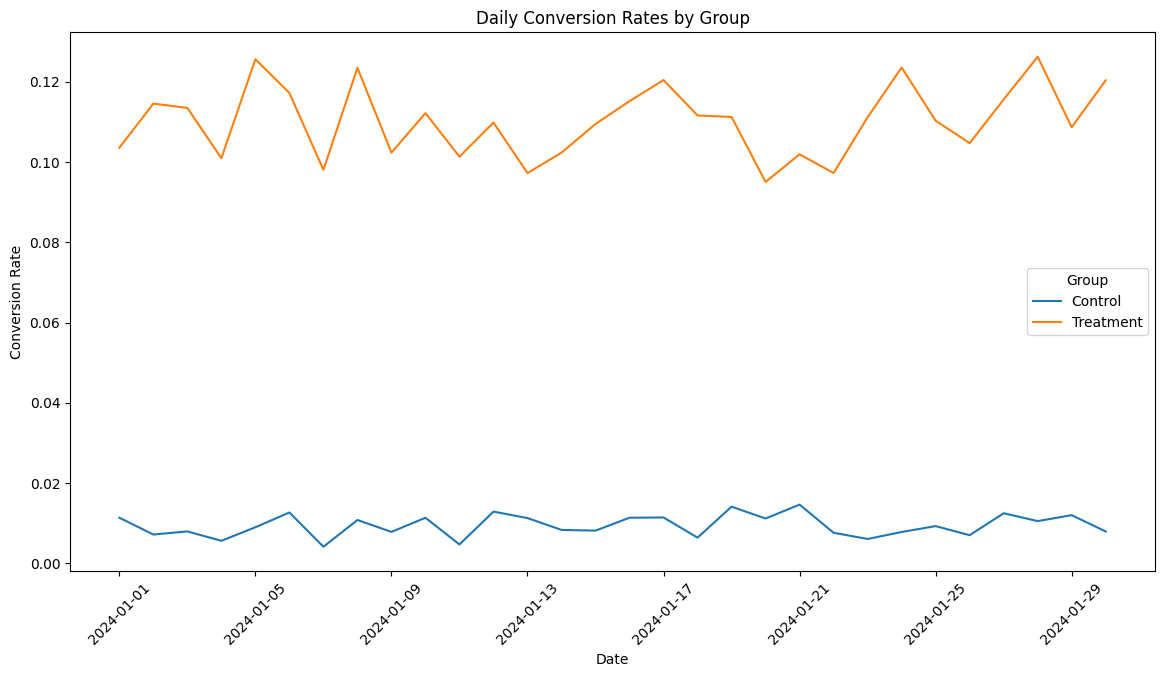

In [56]:
# Extract date from timestamp
df['Date'] = df['Timestamp'].dt.date

# Calculate daily conversion rates for each group
daily_conversion_rates = df.groupby(['Date', 'Group'])['Conversion'].mean().reset_index()

# Plot daily conversion rates
plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Conversion', hue='Group', data=daily_conversion_rates)
plt.title('Daily Conversion Rates by Group')
plt.xlabel('Date')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=45)
plt.show()

### Conclusion

Clearly, treatment group has better engagement.

Let's perform



### Statistical Test

Using **Chi-square test  χ² of Independences**

 This test is used to determine if there is a significant association between two categorical variables.

 Here, in this case, the two variables are:

- Group (Control vs. Treatment)
- Conversion (0 for no purchase, 1 for purchase)

By constructing a contingency table that cross-tabulates the counts of conversions and non-conversions for both control and treatment groups, the chi-square test assesses whether the observed differences in conversion rates between the groups are statistically significant or if they could have occurred by chance.



**Hypothesis Formulation:**

- **Null Hypothesis (𝐻0)**: There is no difference in conversion rates or revenue between the control and treatment groups.
- **Alternative Hypothesis (𝐻1)**: The treatment group (with 360-degree videos) has a higher conversion rate or revenue than the control group.


**P-Value:**
To assess the significance of the result, I'll consider the typical p-value (< 0.05) indicates that the differences are unlikely to have occurred by chance, suggesting a significant association between the group and conversion rate.




In [43]:
import scipy.stats as stats

In [44]:
# Create contingency table
contingency_table = pd.crosstab(df['Group'], df['Conversion'])

# Perform chi-square test
chi2, p, _, _ = stats.chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}")

# Determine statistical significance
alpha = 0.05
if p < alpha:
    print("There is a statistically significant difference in Conversion Rates between groups.")
else:
    print("There is no statistically significant difference in Conversion Rates between groups.")


Chi-square statistic: 4513.31
P-value: 0.0000
There is a statistically significant difference in Conversion Rates between groups.


### Final Conclusion

So, a low p-value indicates that there is a statistically significant difference in Conversion Rates between groups, as the observed differences between the two versions are unlikely to be due to chance.


The conducted A/B test demonstrated a significant positive effect on user engagement and revenue due to 360-degree product videos on the product page.

With 95% confidence level, the treatment group (which included the 360-degree product videos), exhibited a substantial increase in user interaction and average revenue per user compared to the control group.

This feature not only improved user interaction but also contributed to a notable increase in overall sales performance.